In [4]:
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow.keras import Model, layers, optimizers, callbacks, losses, metrics
from tensorflow.keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import seaborn as sns

sns.set_theme()


import matplotlib.pyplot as plt

# News Popullarity Data

https://www.kaggle.com/datasets/thehapyone/uci-online-news-popularity-data-set

https://archive.ics.uci.edu/dataset/332/online+news+popularity

GIven the information about a news article, we need to predict how many times this article is shared

In [5]:
source_path = '../../data/UCI_Online_News_popularity/OnlineNewsPopularity.csv'

data = pd.read_csv(source_path)
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
data.shape

(39644, 61)

In [6]:
data.columns = [col.strip() for col in data.columns]

In [7]:
data = data[data['shares'] < 100000]
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
data.shares.describe(percentiles=[0.1,0.5,0.95])

count    39586.000000
mean      3100.751579
std       5991.066519
min          1.000000
10%        708.000000
50%       1400.000000
95%      10600.000000
max      98700.000000
Name: shares, dtype: float64

<Axes: ylabel='Frequency'>

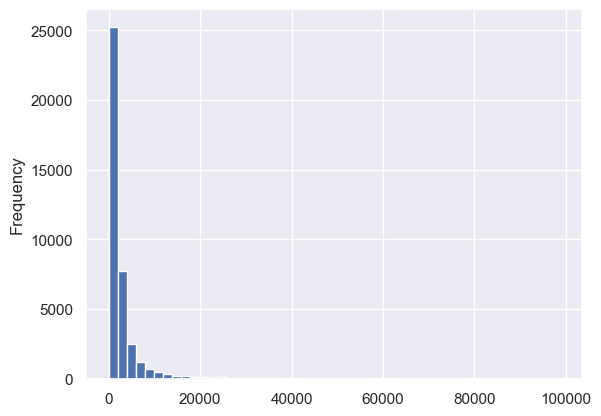

In [9]:
data.shares.plot.hist(bins=50)

# Task details

This problem has one primary task of predicting the number of shares. For MTL, I am adding one more task of predicting if this article will go viral (> 10000 shares)

In [8]:
viral_threshold = 10000
data['viral'] = data.shares.apply(lambda num_shares: 1 if num_shares > viral_threshold else 0)
data['viral'].value_counts()

viral
0    37459
1     2127
Name: count, dtype: int64

This is an unbalanced data problem as well

In [9]:
data.drop('url', axis=1, inplace=True) # we might reuse this column as url embedding as this might have some predictive power
data.shape

(39586, 61)

In [12]:
data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,viral
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [13]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,viral
count,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,...,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000,39586.000000
mean,354.523417,10.397994,546.517254,0.548278,0.996615,0.689271,10.878619,3.294271,4.541757,1.248446,...,0.756760,-0.259474,-0.521874,-0.107452,0.282267,0.071432,0.341809,0.155989,3100.751579,0.053731
std,214.209866,2.113984,470.721844,3.523278,5.235048,3.267194,11.327396,3.855810,8.308267,4.108235,...,0.247678,0.127641,0.290188,0.095269,0.324161,0.265346,0.188803,0.226225,5991.066519,0.225489
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,0.000000
25%,164.000000,9.000000,246.000000,0.470864,1.000000,0.625767,4.000000,1.000000,1.000000,0.000000,...,0.600000,-0.328282,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,945.000000,0.000000
50%,339.000000,10.000000,409.500000,0.539216,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000,0.000000
75%,542.000000,12.000000,716.000000,0.608584,1.000000,0.754627,14.000000,4.000000,4.000000,1.000000,...,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.148504,0.500000,0.250000,2800.000000,0.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,98700.000000,1.000000


In [16]:
data['max_positive_polarity'].nunique()

38

# Preprocess data

In [10]:
targets = ['shares','viral']
features = [col for col in data.columns if col not in targets]
features

['timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_ne

In [11]:
X, y  = data.drop(targets, axis=1), data[targets]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    random_state=2024
)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

y_train = y_train.astype('float')
y_test = y_test.astype('float')

In [25]:
y_test['shares'].describe()

count     3959.000000
mean      3136.136651
std       5954.243125
min         36.000000
25%        943.000000
50%       1400.000000
75%       2800.000000
max      95100.000000
Name: shares, dtype: float64

In [26]:
y_train['shares'].describe()

count    35627.000000
mean      3096.819463
std       5995.214720
min          1.000000
25%        945.000000
50%       1400.000000
75%       2800.000000
max      98700.000000
Name: shares, dtype: float64

In [12]:
scale_feat, do_not_scale = [], []

for feature in features:
    if X_train[feature].nunique() > 2:
        scale_feat.append(feature)
    else:
        do_not_scale.append(feature)

print(scale_feat)
print(do_not_scale)

['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity']
['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_s

In [13]:
feat_scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

X_train_scaled.loc[:,scale_feat] = feat_scaler.fit_transform(X_train_scaled[scale_feat])
X_test_scaled.loc[:,scale_feat] = feat_scaler.transform(X_test_scaled[scale_feat])



In [12]:
y_train_scaled.head()

,shares,viral
0,523.0,0.0
1,2900.0,0.0
2,3200.0,0.0
3,3500.0,0.0
4,1300.0,0.0


In [14]:
target_scaler = StandardScaler()

y_train_scaled.loc[:,'shares'] = [val[0] for val in target_scaler.fit_transform(y_train_scaled['shares'].values.reshape(-1,1))]
y_test_scaled.loc[:,'shares'] = [val[0] for val in target_scaler.transform(y_test_scaled['shares'].values.reshape(-1,1))]

In [14]:
y_train_scaled

,shares,viral
0,-0.429318,0.0
1,-0.032830,0.0
2,0.017211,0.0
3,0.067251,0.0
4,-0.299713,0.0
...,...,...
35622,0.267414,0.0
35623,0.350815,0.0
35624,-0.350254,0.0
35625,-0.350588,0.0


# Define Model Architecture

In [15]:
num_features = len(features)
print('num_features', num_features)

num_features 59


In [16]:
# number of neurons in hidden layers in different parts of the model architecture
shared_dense_units_list = [64, 32] 
regression_dense_units_list = [64, 16]
classification_dense_units_list = [32, 16]

In [26]:
def multi_task_model(num_features, shared_dense_units_list, regression_dense_units_list, classification_dense_units_list, batch_norm, ):

    input_ = layers.Input(shape = (num_features,), name='Input')
    shared_x = layers.BatchNormalization(name = f'bn_inp')(input_)


    # shared layers 
    for i, dense_units in enumerate(shared_dense_units_list):
        shared_x = layers.Dense(units = dense_units, name = f'shared_dense_{i+1}')(shared_x)
        shared_x = layers.ReLU(name=f'shared_relu_{i+1}')(shared_x)

        if batch_norm:
            shared_x = layers.BatchNormalization(name=f'shared_bn_{i+1}')(shared_x)
        shared_x = layers.Dropout(0.2, name=f'shared_dropout_{i+1}')(shared_x)

    # regression Head
    if len(regression_dense_units_list) > 0:
        regression_x = layers.Dense(units = regression_dense_units_list[0], name='regr_dense_1')(shared_x)
        regression_x = layers.ReLU(name=f'regr_relu_1')(regression_x)

        for i, dense_units in enumerate(regression_dense_units_list[1:]):
            regression_x = layers.Dense(units = dense_units, name=f'regr_dense_{i+2}')(regression_x)
            regression_x = layers.ReLU(name=f'regr_relu_{i+2}')(regression_x)

            if batch_norm:
                regression_x = layers.BatchNormalization(name=f'regr_bn_{i+1}')(regression_x)
            regression_x = layers.Dropout(0.2, name=f'regr_dropout_{i+1}')(regression_x)
    
    if len(regression_dense_units_list) > 0:
        regression_output = layers.Dense(1, name='regr_out')(regression_x)
    else:
        regression_output = layers.Dense(1, name='regr_out')(shared_x)
    

    # classification head
    if len(classification_dense_units_list) > 0:
        clf_x = layers.Dense(units = classification_dense_units_list[0], name='clf_dense_1')(shared_x)
        clf_x = layers.ReLU(name=f'clf_relu_1')(clf_x)

        for i, dense_units in enumerate(classification_dense_units_list[1:]):
            clf_x = layers.Dense(units = dense_units, name=f'clf_dense_{i+2}')(clf_x)
            clf_x = layers.ReLU(name=f'clf_relu_{i+2}')(clf_x)

            if batch_norm:
                clf_x = layers.BatchNormalization(name=f'clf_bn_{i+1}')(clf_x)
            clf_x = layers.Dropout(0.2, name=f'clf_dropout_{i+1}')(clf_x)
    
    if len(classification_dense_units_list) > 0:
        clf_output = layers.Dense(1, name='p_clf', activation='sigmoid')(clf_x)
    else:
        clf_output = layers.Dense(1, name='p_clf', activation='sigmoid')(shared_x)

    
    model = Model(input_, [regression_output, clf_output], name='model')

    return model



def plot_history(model_history, metrics):
    n_cols = 2
    n_rows = int(np.ceil(len(metrics)/n_cols))

    print(n_cols, len(metrics), n_rows)

    fig, ax = plt.subplots(n_rows, n_cols, sharex = False, sharey = False, figsize=(12, 5*n_rows))

    ax = np.array(ax)
    ax = ax.flatten()

    for i, metric in enumerate(metrics):
        ax[i].plot(model_history.history[metric], label='Training')
        ax[i].plot(model_history.history['val_'+metric], label='Validation')
        ax[i].set_title(metric)
        ax[i].legend()
        ax[i].set(xlabel='Epoch')
    
    fig.tight_layout()
    plt.show()

    return fig

In [18]:
mtl_model = multi_task_model(num_features = num_features, 
                             shared_dense_units_list = shared_dense_units_list, 
                             regression_dense_units_list = regression_dense_units_list, 
                             classification_dense_units_list = classification_dense_units_list,
                             batch_norm = True
                             )

In [19]:
mtl_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input (InputLayer)          [(None, 59)]                 0         []                            
                                                                                                  
 bn_inp (BatchNormalization  (None, 59)                   236       ['Input[0][0]']               
 )                                                                                                
                                                                                                  
 shared_dense_1 (Dense)      (None, 64)                   3840      ['bn_inp[0][0]']              
                                                                                                  
 shared_relu_1 (ReLU)        (None, 64)                   0         ['shared_dense_1[0][0]']  

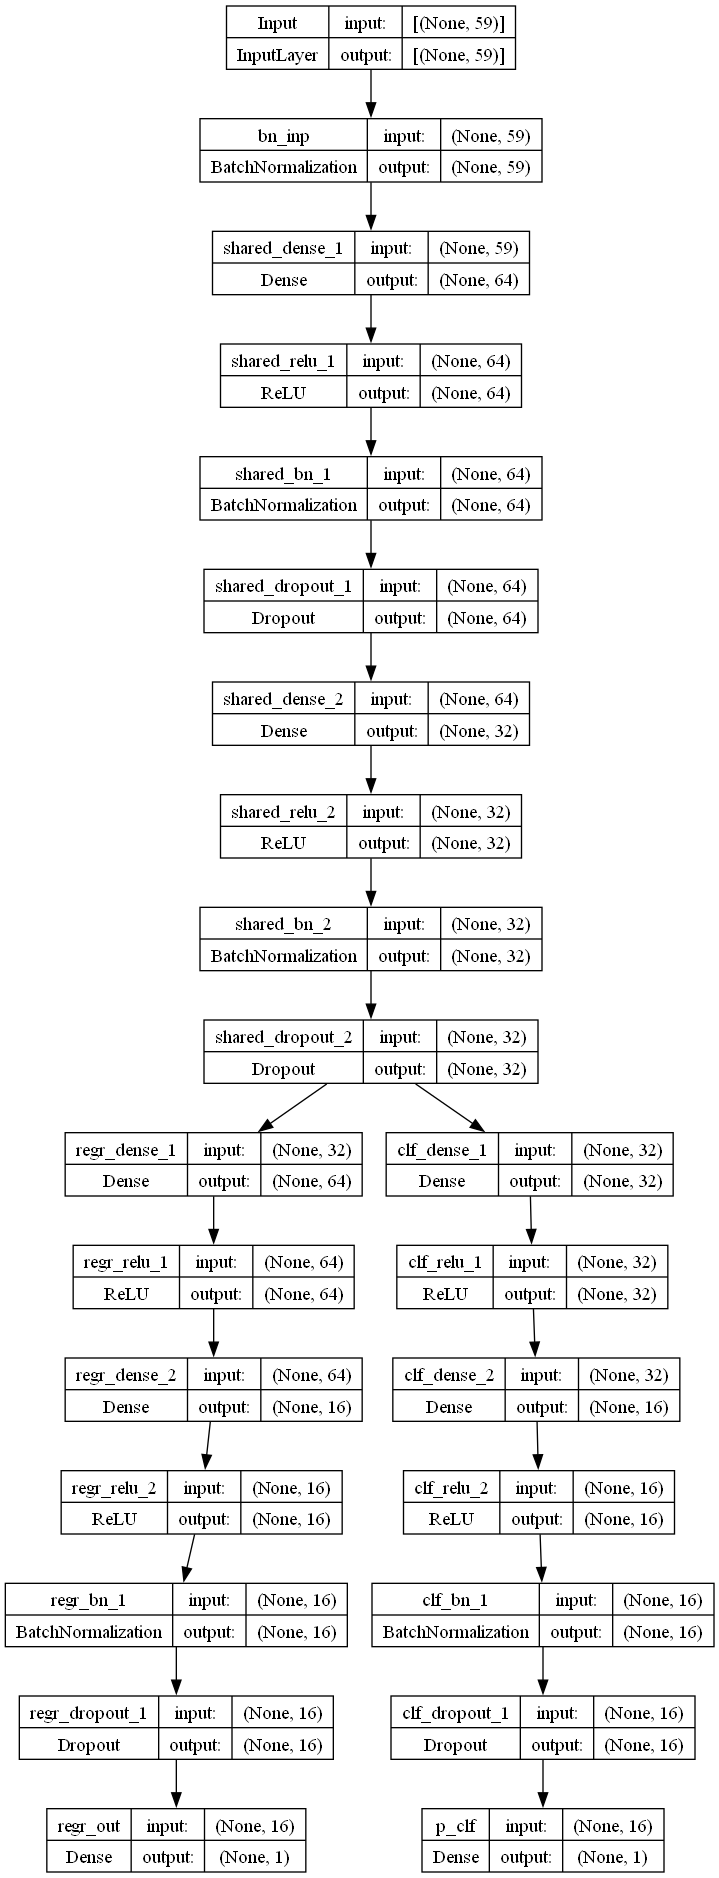

In [50]:
tf.keras.utils.plot_model(mtl_model, "mtl_model.png", show_shapes=True)

# Train the Model

In [20]:
import tensorflow.keras.backend as K

def scale_mse(y_true, y_pred):

    error = y_true - y_pred
    squared_error = K.square(error)
    mean_sqr_error = K.mean(squared_error)
    return mean_sqr_error / 3


def output_form(data):
    """
    converts label for multi class labels
    """
    regr = data['shares']
    regr = np.array(regr)

    clsf = data['viral']
    clsf = np.array(clsf)

    return (regr, clsf)

scaled_train_y = output_form(y_train_scaled)
scaled_test_y = output_form(y_test_scaled)

In [21]:
learning_rate = 0.0004

optimizer = optimizers.Adam(learning_rate=learning_rate)
mtl_model.compile(
    optimizer = optimizer,
    loss = {
        'p_clf': tf.keras.losses.BinaryCrossentropy(),
        'regr_out': tf.keras.losses.MeanSquaredError()
    },
    metrics = {
        'p_clf': [tf.keras.metrics.AUC(name='auc')],
        'regr_out': [tf.keras.metrics.RootMeanSquaredError(name='rmse'), tf.keras.metrics.MeanAbsolutePercentageError('mape')]
    }
)

In [22]:
EPOCHS = 50

In [23]:
early_stop_cb = callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', restore_best_weights=True, min_delta=0.001)

In [24]:
history = mtl_model.fit(
    x = X_train_scaled.values,
    y = scaled_train_y,
    validation_data = (X_test_scaled.values, scaled_test_y),
    epochs = EPOCHS,
    callbacks = [early_stop_cb],
    batch_size = 64
)

Epoch 1/50
557/557 [==============================] - 5s 5ms/step - loss: 2.0456 - regr_out_loss: 1.4752 - p_clf_loss: 0.5704 - regr_out_rmse: 1.2146 - regr_out_mape: 1077.4736 - p_clf_auc: 0.5309 - val_loss: 1.3626 - val_regr_out_loss: 1.0011 - val_p_clf_loss: 0.3616 - val_regr_out_rmse: 1.0005 - val_regr_out_mape: 451.7573 - val_p_clf_auc: 0.5687
Epoch 2/50
557/557 [==============================] - 2s 4ms/step - loss: 1.4342 - regr_out_loss: 1.1381 - p_clf_loss: 0.2961 - regr_out_rmse: 1.0668 - regr_out_mape: 651.1101 - p_clf_auc: 0.5484 - val_loss: 1.1937 - val_regr_out_loss: 0.9718 - val_p_clf_loss: 0.2218 - val_regr_out_rmse: 0.9858 - val_regr_out_mape: 326.8739 - val_p_clf_auc: 0.6033
Epoch 3/50
557/557 [==============================] - 2s 4ms/step - loss: 1.2821 - regr_out_loss: 1.0520 - p_clf_loss: 0.2301 - regr_out_rmse: 1.0257 - regr_out_mape: 513.4421 - p_clf_auc: 0.5620 - val_loss: 1.1700 - val_regr_out_loss: 0.9607 - val_p_clf_loss: 0.2093 - val_regr_out_rmse: 0.9802 - v

2 4 2


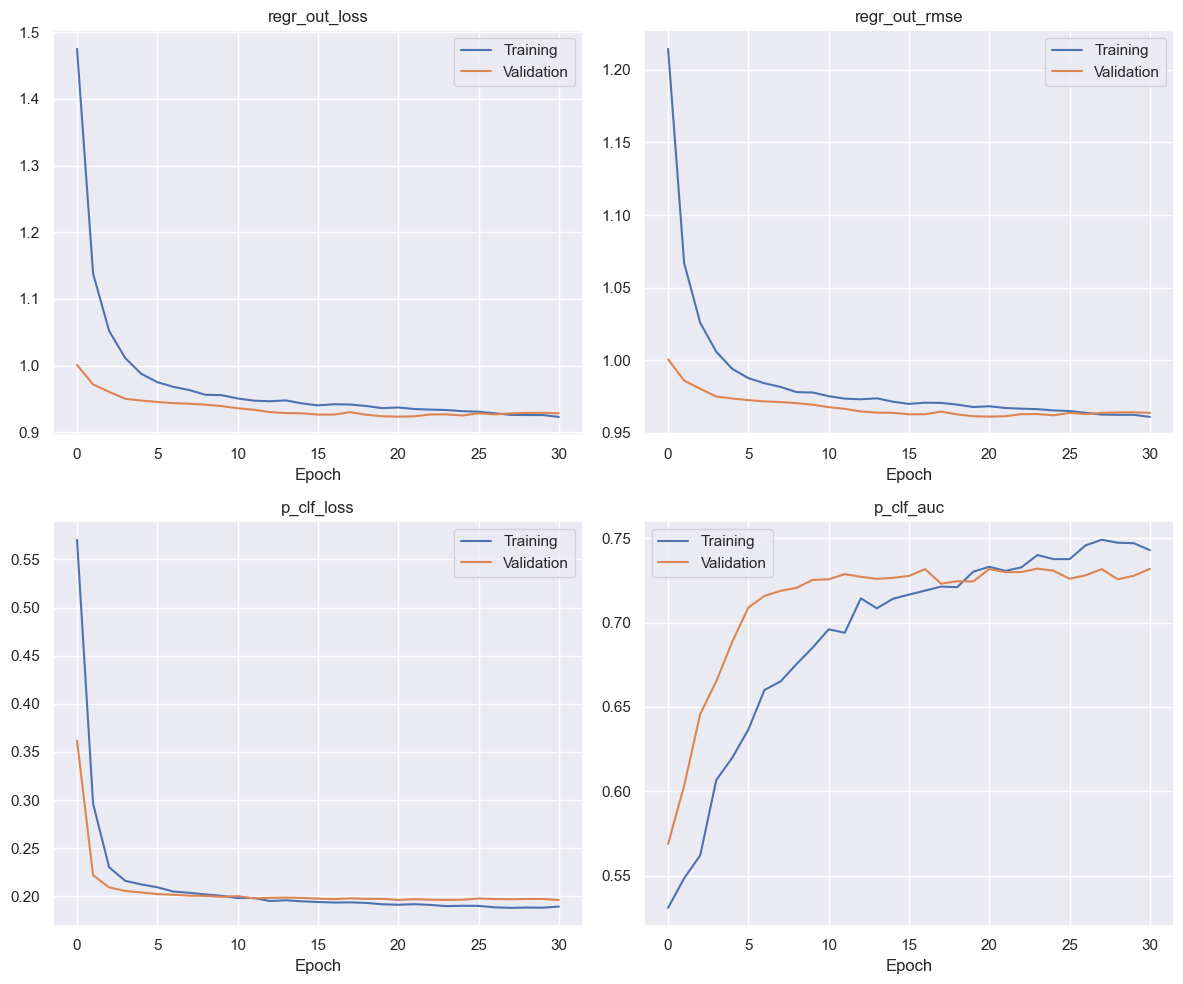

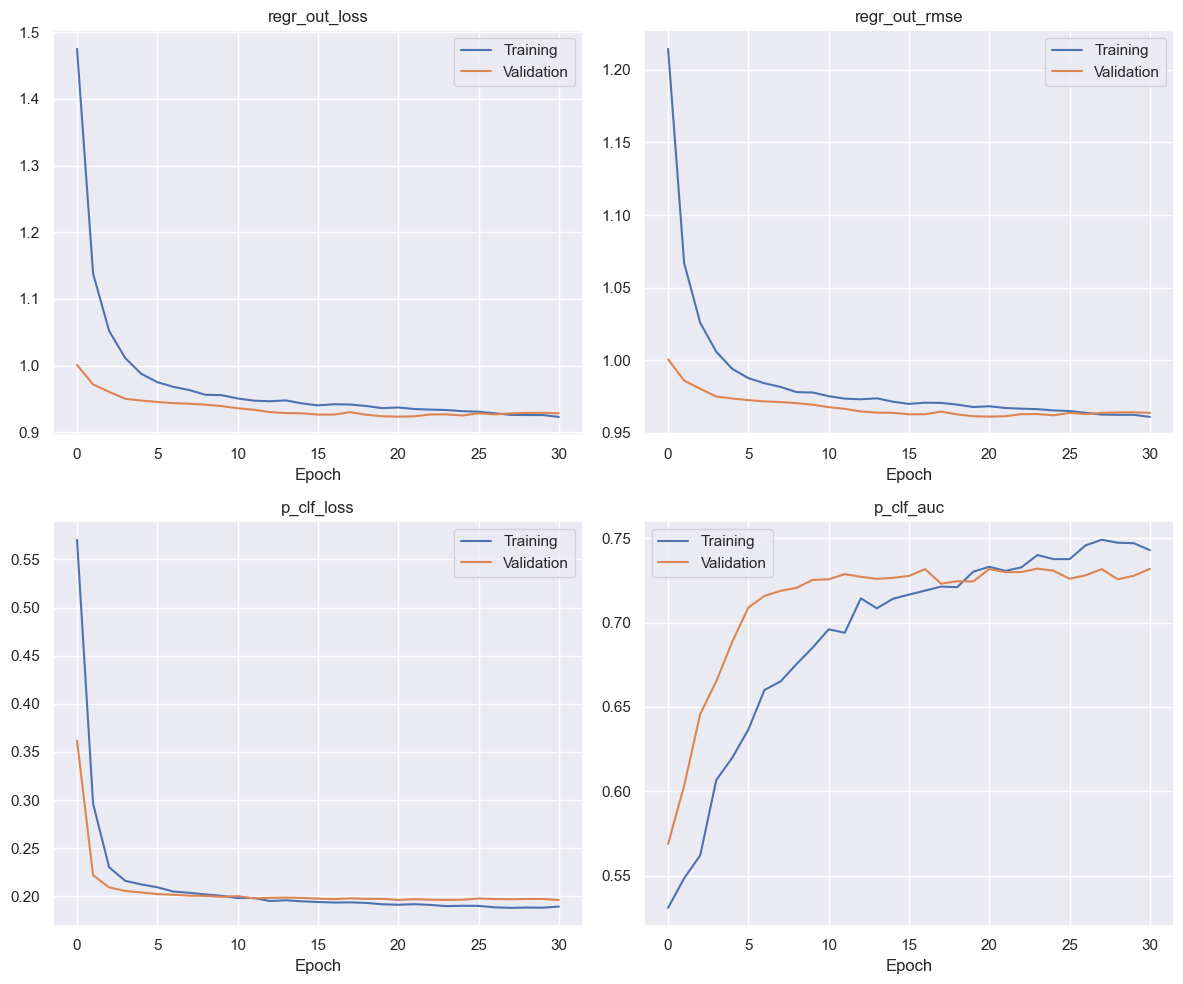

In [27]:
plot_history(history, metrics=["regr_out_loss", "regr_out_rmse", "p_clf_loss", "p_clf_auc"])

In [28]:
mtl_model.save("models/mtl_model_shares")

INFO:tensorflow:Assets written to: models/mtl_model_shares\assets


INFO:tensorflow:Assets written to: models/mtl_model_shares\assets


In [43]:
y_pred = mtl_model.predict(X_test_scaled)

124/124 [==============================] - 0s 2ms/step


In [50]:
y_pred[1].reshape(1,-1)[0]

array([0.02266786, 0.00977525, 0.133369  , ..., 0.1001442 , 0.03222245,
       0.007267  ], dtype=float32)

In [53]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

def plot_aupr(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    aupr = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'AUPR = {aupr:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()

In [57]:
y_test_scaled.viral.values

array([0., 0., 0., ..., 0., 0., 0.])

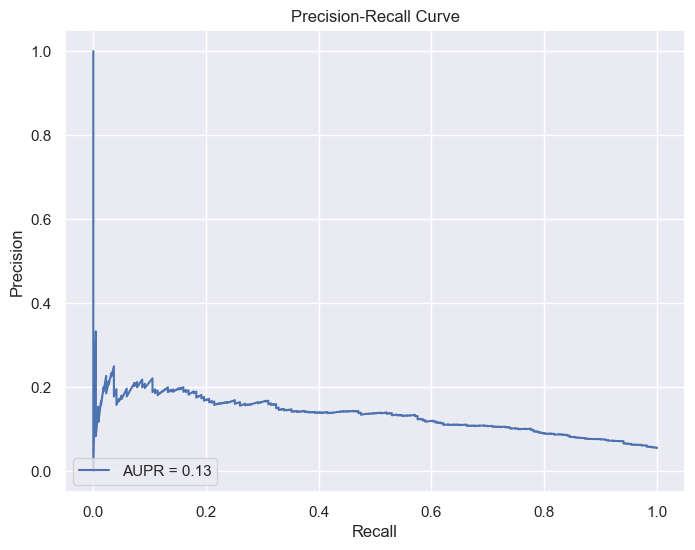

In [60]:
y_true_in = y_test_scaled.viral.values
y_pred_in = y_pred[1].reshape(1,-1)[0] 

plot_aupr(y_true_in, y_pred_in)